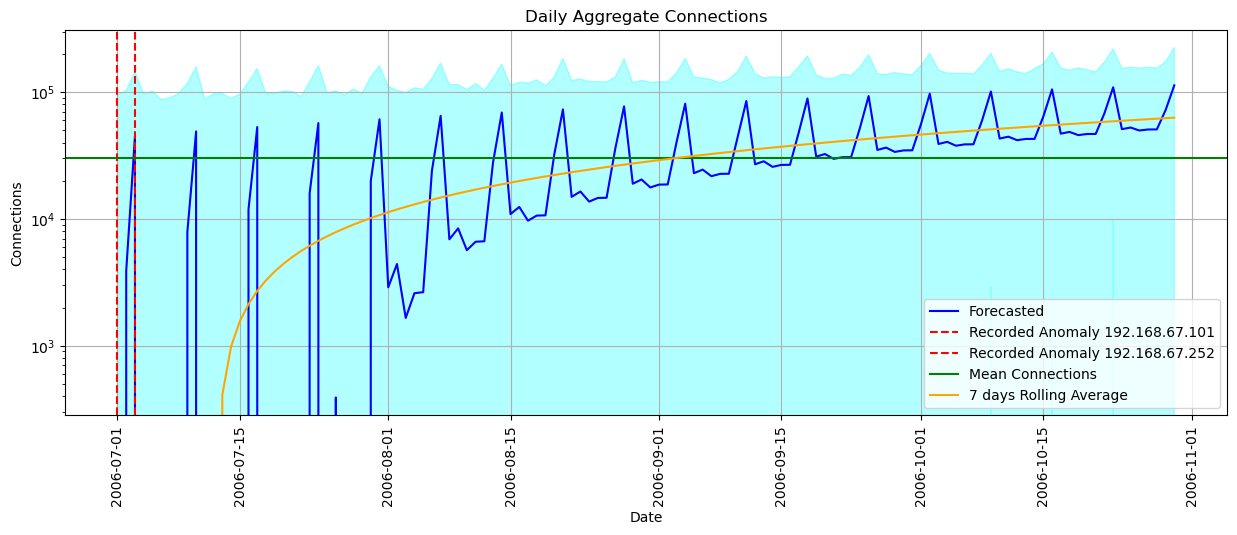

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load daily aggregate connections or forecasted data
daily_aggregate = pd.read_csv('forecasted_data.csv')

# Convert 'ds' column to datetime format
daily_aggregate['ds'] = pd.to_datetime(daily_aggregate['ds'])

# Assuming 'marked_anomalies' is a DataFrame containing anomalies
# Replace this with your actual anomalies data
marked_anomalies = pd.DataFrame({
    'date': ['2006-07-01', '2006-07-03'],  # Example dates of anomalies
    'l_ipn': ['192.168.67.101', '192.168.67.252']  # Example IPs of anomalies
})

# Plotting the daily aggregate connections or forecasted values
daily_mean = round(daily_aggregate['yhat'].mean(), 2)
plt.figure(figsize=(15, 5))
plt.plot(daily_aggregate['ds'], daily_aggregate['yhat'], label='Forecasted', color='b')  # Replace 'f' with 'yhat' for forecasted data

# Plot recorded anomalies
for date, ip in zip(marked_anomalies['date'], marked_anomalies['l_ipn']):
    plt.axvline(x=mdates.date2num(pd.to_datetime(date)), color='r', linestyle='--', label=f'Recorded Anomaly {ip}')

# Plot mean connections line
plt.axhline(y=daily_mean, color='g', label='Mean Connections')

# Plot 7 days rolling average
plt.plot(daily_aggregate['ds'], daily_aggregate['yhat'].rolling(7).mean(), label='7 days Rolling Average', color='orange')  # Replace 'f' with 'yhat' for forecasted data

# Other plot settings
plt.xticks(rotation='vertical')
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Connections')
plt.title('Daily Aggregate Connections')
plt.fill_between(daily_aggregate['ds'], daily_aggregate['yhat_lower'], daily_aggregate['yhat_upper'], color='aqua', alpha=0.3)  # Adjust for uncertainty bands
plt.legend()
plt.grid(True)  # Add grid lines
plt.show()


Index(['ds', 'yhat', 'yhat_lower', 'yhat_upper'], dtype='object')


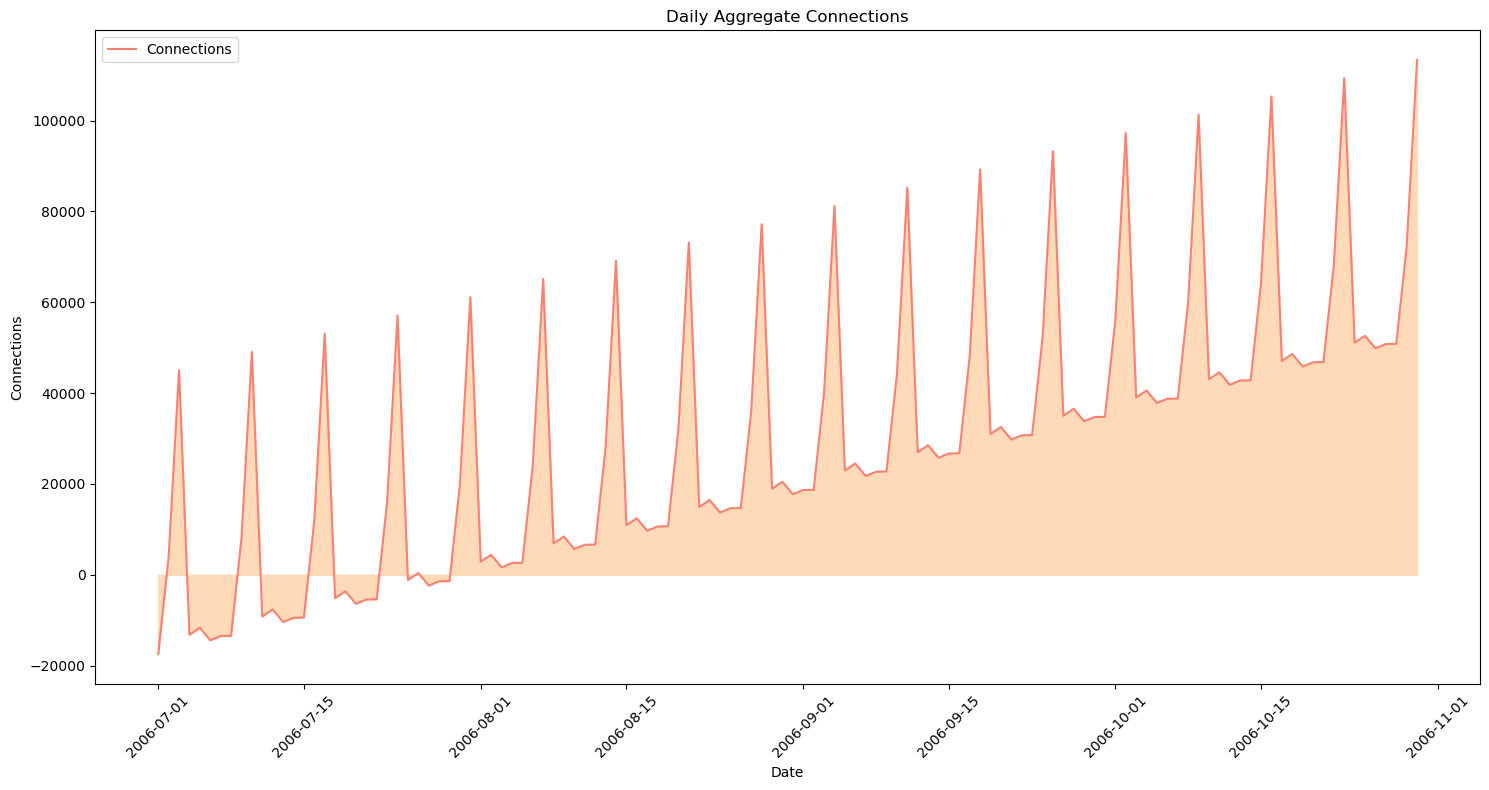

In [15]:
import matplotlib.pyplot as plt

# Assuming daily_aggregate is already loaded and processed from forecasted_data.csv
# Convert 'ds' column to datetime format if not already done
daily_aggregate['ds'] = pd.to_datetime(daily_aggregate['ds'])

# Verify column names and structure
print(daily_aggregate.columns)

# Assuming the column names are 'ds', 'yhat' and there's no 'l_ipn'
# Aggregating daily connections per date
daily_aggregate_per_day = daily_aggregate.groupby('ds')['yhat'].sum().reset_index()

# Create subplots for each l_ipn (in this case, just for daily aggregate)
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(daily_aggregate_per_day['ds'], daily_aggregate_per_day['yhat'], color='salmon', label='Connections')
ax.fill_between(daily_aggregate_per_day['ds'], daily_aggregate_per_day['yhat'], color='peachpuff')

# Adjust labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Connections')
ax.set_title('Daily Aggregate Connections')

# Format x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd

# Assuming forecasted_data is your DataFrame containing the data
forecasted_data = pd.read_csv('forecasted_data.csv')

def get_daily_aggregate_l_ipn(in_l_ipn):
    # Filter by l_ipn
    temp_df = forecasted_data[forecasted_data['ip_address'] == in_l_ipn][['ds', 'yhat']]
    
    # Rename columns to match expected output
    temp_df.columns = ['ds', 'y']
    
    # Convert 'ds' to datetime if not already
    temp_df['ds'] = pd.to_datetime(temp_df['ds'])
    
    # Reset index
    temp_df.reset_index(drop=True, inplace=True)
    
    return temp_df


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

def get_forecast(ts, in_l_ipn):
    # Initialize Prophet model with desired seasonality settings
    model = Prophet(seasonality_mode='additive', daily_seasonality=False, yearly_seasonality=False, weekly_seasonality=True)
    
    # Fit the model with the provided time series data
    model.fit(ts)
    
    # Make predictions with the fitted model
    forecast = model.predict(pd.DataFrame(ts['ds']))
    
    # Initialize 'anomaly' column in the original time series data
    ts['anomaly'] = 0
    
    # Initialize color array for plotting points
    p_color = np.full((ts.shape[0], 1), 'green')
    
    # Detect anomalies based on confidence intervals
    for i in range(forecast.shape[0]):
        if (forecast.at[i, 'yhat_lower'] > ts.at[i, 'y']) or (forecast.at[i, 'yhat_upper'] < ts.at[i, 'y']):
            ts.at[i, 'anomaly'] = 1
            p_color[i] = 'red'
    
    # Plotting forecast and anomalies
    model.plot(forecast)
    plt.scatter(ts['ds'], ts['y'], c=p_color.ravel())
    plt.title(f'Forecast plot for l_ipn {in_l_ipn}')
    plt.show()


ModuleNotFoundError: No module named 'fbprophet'